# Support Vector Machine (SVM) from scratch.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class SVM:

    def __init__(self, alpha = 0.0001, lambda_value = 0.01, n_iters = 5000, kernal = None):
        self.lr = alpha
        self.lambda_value  = lambda_value 
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.kernal=kernal

#     def dot_kernal(self,X):
#         return np.dot(X,X.T)
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.X = X
        if self.kernal=='dot':
            X = np.dot(X,X.T)
            
        if self.kernal =="sq_dot":
            X = np.square(np.dot(X,X.T))
            
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_value  * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_value  * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        if self.kernal=='dot':
            X = np.dot(X,self.X.T)
            
        if self.kernal =="sq_dot":
            X = np.square(np.dot(X,self.X.T))
            
        if self.kernal == "sq":
            X = np.square(np.dot(X.self.X.T))+1
            
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Data Pre-processing:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sem 2/AML/Assignments/Assignment 4/data1.csv', header=None) 
data_1.head()

,0,1,2,3
0,-5.21460,7.0880,6.72920,1
1,-0.42176,8.4266,7.89610,1
2,-6.13460,5.6864,6.08860,1
3,6.21260,8.3078,2.36230,1
4,6.34460,7.6650,0.53239,1


In [39]:
data_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sem 2/AML/Assignments/Assignment 4/data2.csv', header=None)
data_2.head()

,0,1,2,3
0,0.990380,4.48290,-3.11220,1
1,-2.766600,1.42370,-0.53699,1
2,-0.092697,-0.55933,-0.44413,1
3,-0.308360,0.56371,-0.40212,1
4,-0.343690,0.21188,4.39850,1


In [44]:
data_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sem 2/AML/Assignments/Assignment 4/data3.csv', header=None) 
data_3.head()

,0,1,2
0,-83.238,-278.68,1
1,60.355,248.34,1
2,-260.040,-197.77,1
3,225.210,349.31,1
4,99.462,304.19,1


In [43]:
data_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sem 2/AML/Assignments/Assignment 4/data4.csv', header=None) 
data_4.head()

,0,1,2
0,0.76512,-5.5067,1
1,2.04200,-2.9351,1
2,0.92004,-4.7613,1
3,0.86299,-4.9384,1
4,1.82230,-5.3780,1


In [42]:
data_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sem 2/AML/Assignments/Assignment 4/data5.csv', header=None) 
data_5.head()

,0,1,2,3
0,57,69,1,1
1,86,15,1,1
2,78,57,11,1
3,97,19,3,1
4,64,79,11,1


In [41]:
data_6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sem 2/AML/Assignments/Assignment 4/Data 6.csv', header=None) 
data_6.head()

,0,1,2
0,5.44720,6.0438,1.23900
1,3.65440,4.1229,-1.41410
2,0.70602,12.6740,-0.86498
3,1.41920,14.3120,1.21250
4,0.44894,10.7100,-0.68951


In [40]:
data_7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sem 2/AML/Assignments/Assignment 4/Data 7.csv', header=None) 
data_7.head()

,0,1,2
0,1.42790,-0.33432,0.63610
1,-0.46831,0.20271,-1.38860
2,0.27293,0.41174,-1.65890
3,0.76238,0.23091,-0.75271
4,-0.41469,-1.05030,-1.47630


# Implementation:

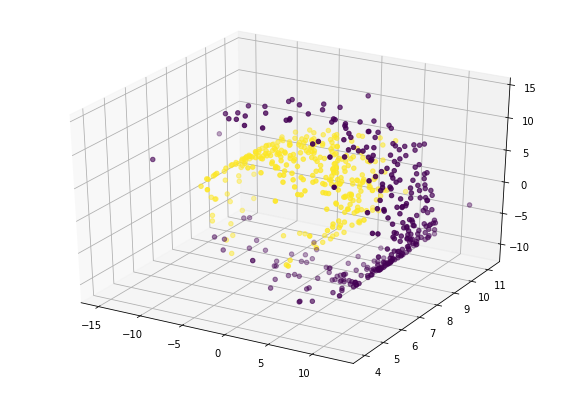

In [6]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_1[0], data_1[1], data_1[2], c = data_1[3])
plt.show()

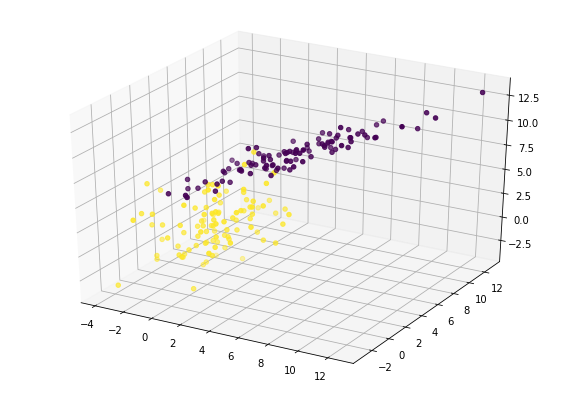

In [7]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_2[0], data_2[1], data_2[2], c = data_2[3])
plt.show()

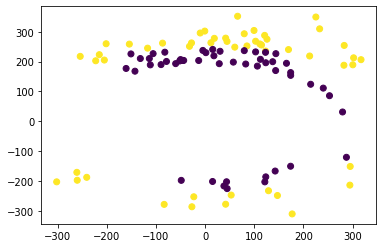

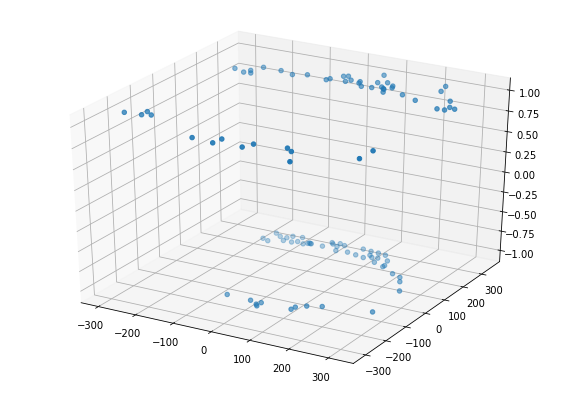

In [8]:
plt.scatter(data_3[0],data_3[1],c=data_3[2])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_3[0],data_3[1],data_3[2])
plt.show()


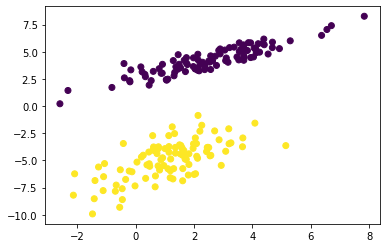

In [9]:
plt.scatter(data_4[0],data_4[1],c=data_4[2])

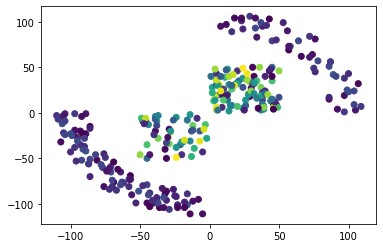

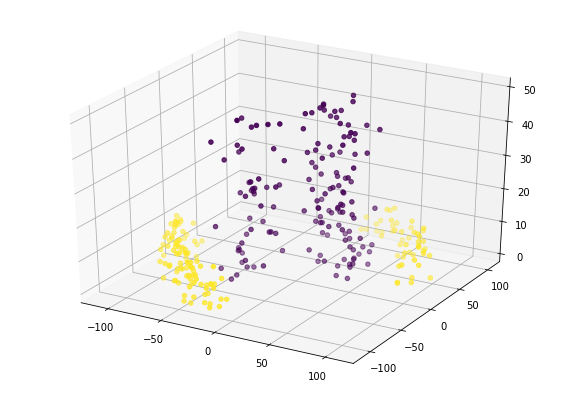

In [10]:
plt.scatter(data_5[0],data_5[1],c=data_5[2])
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_5[0], data_5[1], data_5[2], c = data_5[3])
plt.show()

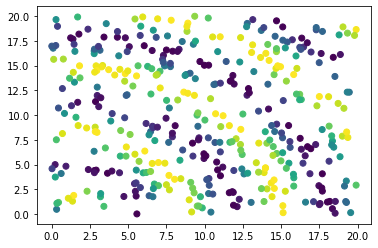

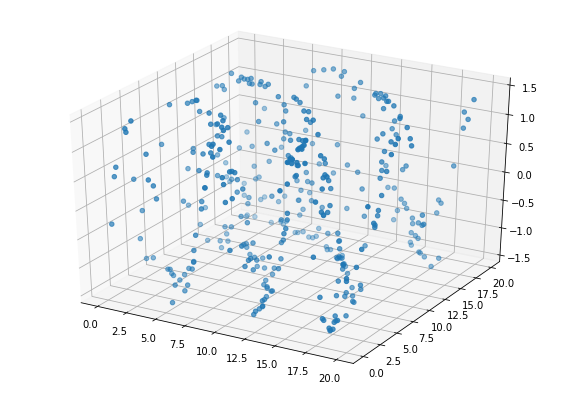

In [11]:
plt.scatter(data_6[0],data_6[1],c=data_6[2])


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_6[0], data_6[1],data_6[2])
plt.show()


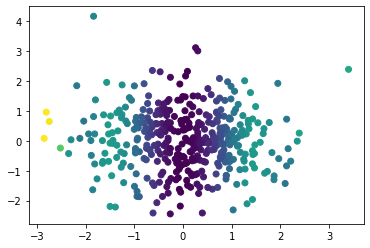

In [12]:
plt.scatter(data_7[0],data_7[1],c=data_7[2])

In [17]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_1[[0,1,2]],data_1[3],test_size=0.3)
svm = SVM(kernal='dot')
svm.fit(X_train1,y_train1)
y_predicted1 = svm.predict(np.array(X_test1))
len(y_test1[y_predicted1==y_test1])/len(y_test1)

0.7277777777777777

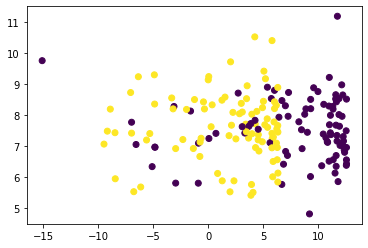

In [18]:
plt.scatter(X_test1[0],X_test1[1],c=y_test1)

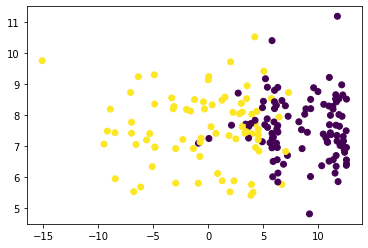

In [19]:
plt.scatter(X_test1[0],X_test1[1],c=y_predicted1)

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_2[[0,1,2]],data_2[3],test_size=0.3)
svm = SVM(kernal='dot')
svm.fit(X_train2,y_train2)
y_predicted2 = svm.predict(np.array(X_test2))
len(y_test2[y_predicted2==y_test2])/len(y_test2)

0.6666666666666666

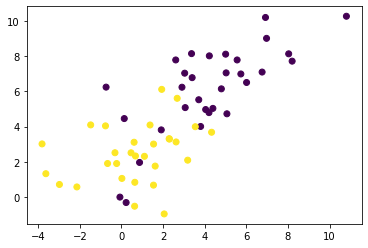

In [21]:
plt.scatter(X_test2[0],X_test2[1],c=y_test2)

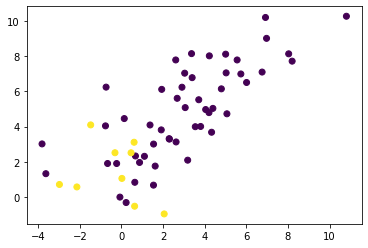

In [22]:
plt.scatter(X_test2[0],X_test2[1],c=y_predicted2)

In [23]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(data_4[[0,1]],data_4[2],test_size=0.3)
svm = SVM(kernal='sq_dot')
svm.fit(X_train4,y_train4)
y_predicted4 = svm.predict(np.array(X_test4))
len(y_test4[y_predicted4==y_test4])/len(y_test4)

0.9666666666666667

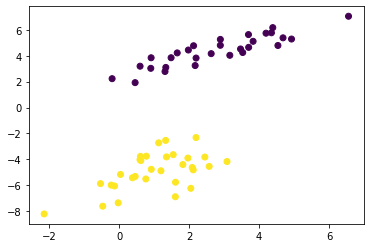

In [24]:
plt.scatter(X_test4[0],X_test4[1],c=y_test4)

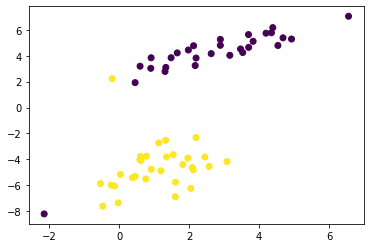

In [25]:
plt.scatter(X_test4[0],X_test4[1],c=y_predicted4)

In [27]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(data_5[[0,1,2]],data_5[3],test_size=0.3)
svm = SVM(kernal='sq_dot')
svm.fit(X_train5,y_train5)
y_predicted5 = svm.predict(np.array(X_test5))
len(y_test5[y_predicted5==y_test5])/len(y_test5)

0.8444444444444444

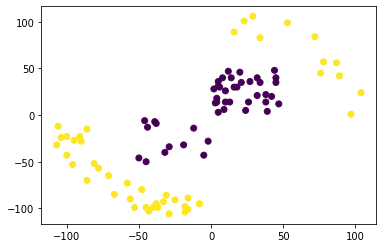

In [28]:
plt.scatter(X_test5[0],X_test5[1],c=y_test5)

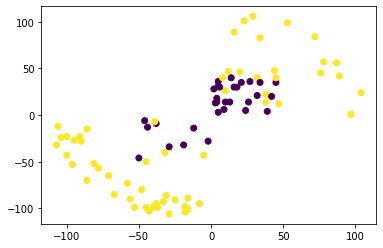

In [29]:
plt.scatter(X_test5[0],X_test5[1],c=y_predicted5)

In [45]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(data_6[[0,1,2]],data_6[2],test_size=0.3)
svm = SVM(kernal='sq_dot')
svm.fit(X_train6,y_train6)
y_predicted6 = svm.predict(np.array(X_test6))
len(y_test6[y_predicted6==y_test6])/len(y_test6)

0.0

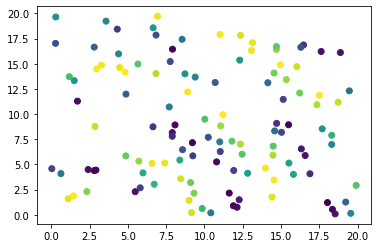

In [46]:
plt.scatter(X_test6[0],X_test6[1],c=y_test6)

In [30]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(data_7[[0,1]],data_7[2],test_size=0.3)
svm = SVM(kernal='sq_dot')
svm.fit(X_train7, y_train7)
y_predicted7 = svm.predict(np.array(X_test7))
len(y_test7[y_predicted7==y_test7])/len(y_test7)

0.0

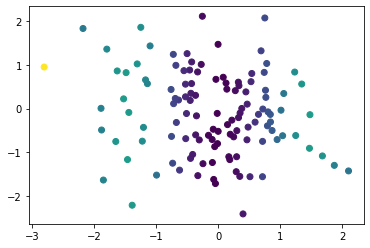

In [33]:
plt.scatter(X_test7[0],X_test7[1],c=y_test7)